In [11]:
#import the libraries.

from rasterio.plot import show
from rasterio.merge import merge
import rasterio as rio
import numpy as np
import os
%matplotlib inline
from pathlib import Path

In [ ]:
# create the output folder.

path = Path('C:/dem_index')
Path('output').mkdir(parents=True, exist_ok=True)
output_path = 'D:/mosaic/mosaic_output.tif'

In [12]:
# iterate over the available .tif files in the data folder.

raster_files = list(path.iterdir())
raster_to_mosiac = []

In [13]:
# append list of .tif files for merge.

for p in raster_files:
    raster = rio.open(p)
    raster_to_mosiac.append(raster)

In [14]:
# create mosaic file.

mosaic, output = merge(raster_to_mosiac)

In [15]:
# copy the raster's metadata and update.

output_meta = raster.meta.copy()
output_meta.update(
    {"driver": "GTiff",
        "height": mosaic.shape[1],
        "width": mosaic.shape[2],
        "transform": output,
    }
)

In [17]:
# write the mosaiced file in a local folder.

with rio.open(output_path, 'w', **output_meta) as m:
    m.write(mosaic)

In [23]:
# define data directory for view mosaic data.

data_dir = "D:\mosaic_dem"

In [24]:
# Filepath.

fp = os.path.join(data_dir, "mosaic.tif")

In [25]:
# Open the file:

raster = rio.open(fp)

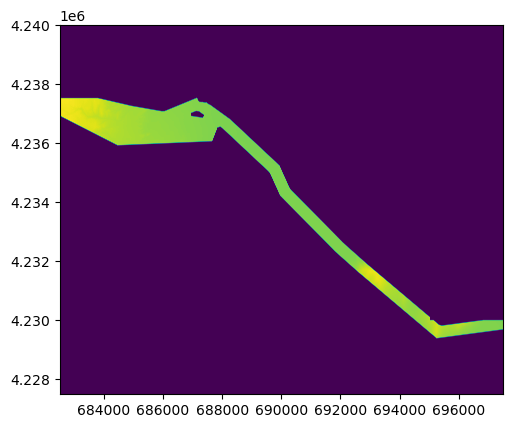

<Axes: >

In [26]:
# Plot band 1.

show((raster, 1))